In [1037]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

### 1.- EDA

In [1038]:
data = pd.read_csv("data/train.csv")

In [1039]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1040]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1041]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Univariate

In [1042]:
# passengerID
data.Survived.value_counts() / len(data)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [1043]:
#PassengerClass
data.Pclass.value_counts()/ len(data)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [1044]:
#Sex
data.Sex.value_counts()/ len(data)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

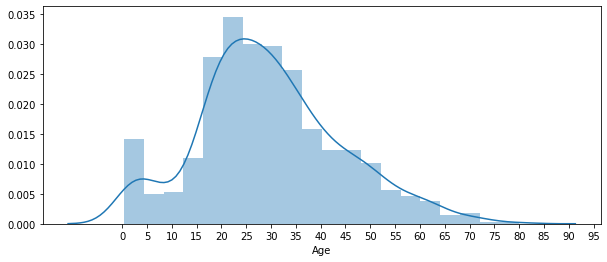

In [1045]:
#Age
plt.subplots(figsize=(10,4))
sns.distplot(data.Age.dropna()).set_xticks([i for i in range(0,100,5)])

In [1046]:
data[data.Age<1 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


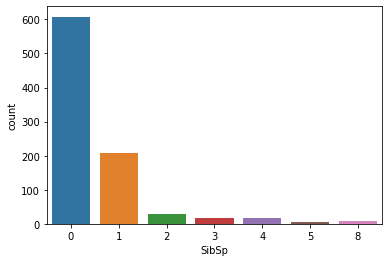

In [1047]:
#SibSp
sns.countplot(data.SibSp)

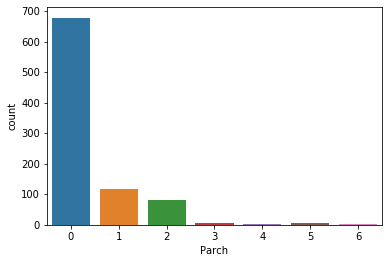

In [1048]:
#ParCh
sns.countplot(data.Parch)

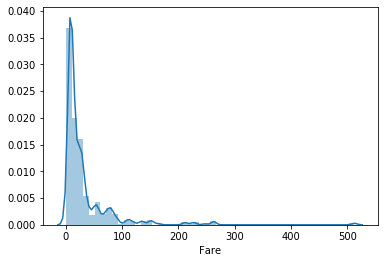

In [1049]:
#Fare
sns.distplot(data.Fare.dropna())

In [1050]:
data[data.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


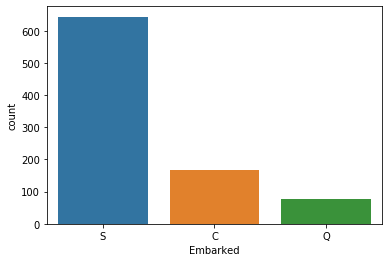

In [1051]:
#Embarked
sns.countplot(data.Embarked)

In [1052]:
data[data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [1053]:
#Ticket

len(data.Ticket.unique())

681

In [1054]:
data.groupby("Ticket")["Name"].count()

Ticket
110152                3
110413                3
110465                2
110564                1
110813                1
111240                1
111320                1
111361                2
111369                1
111426                1
111427                1
111428                1
112050                1
112052                1
112053                1
112058                1
112059                1
112277                1
112379                1
113028                1
113043                1
113050                1
113051                1
113055                1
113056                1
113059                1
113501                1
113503                1
113505                2
113509                1
113510                1
113514                1
113572                2
113760                4
113767                1
113773                1
113776                2
113781                4
113783                1
113784                1
113786                1
113787   

In [1055]:
data[data.Ticket == "110152"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


#### Bivariate

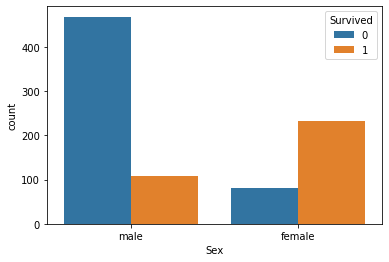

In [1056]:
# Sex vs Survived
sns.countplot(x="Sex", hue="Survived", data=data)

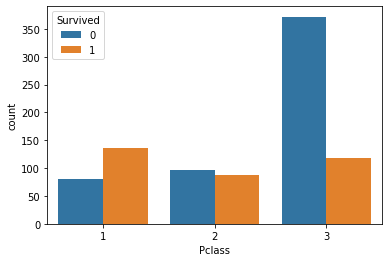

In [1057]:
# Pclass vs Sex
sns.countplot(x="Pclass", hue="Survived", data=data)

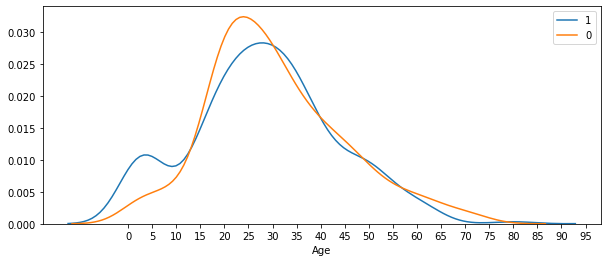

In [1058]:
# Age vs Survived
plt.subplots(figsize=(10,4))
sns.distplot(data[data.Survived == 1]["Age"].dropna(), hist=False, label="1").set_xticks([i for i in range(0,100,5)])
sns.distplot(data[data.Survived == 0]["Age"].dropna(), hist=False, label="0").set_xticks([i for i in range(0,100,5)])
plt.legend()


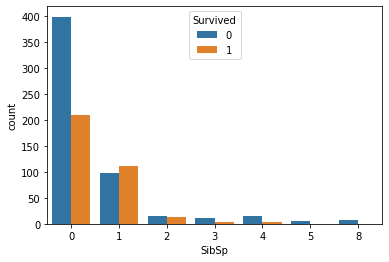

In [1059]:
# SibSp vs Survived
sns.countplot(x="SibSp", hue="Survived", data=data)

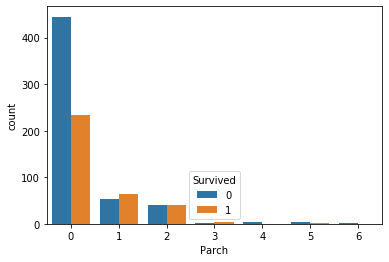

In [1060]:
# ParCh vs Survived
sns.countplot(x="Parch", hue="Survived", data=data)

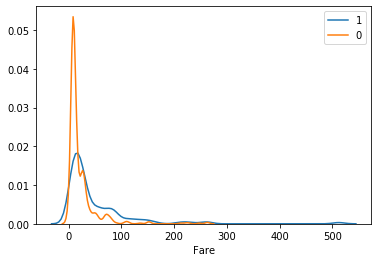

In [1061]:
# Fare vs Survived
sns.distplot(data[data.Survived == 1]["Fare"].dropna(), hist=False, label="1")
sns.distplot(data[data.Survived == 0]["Fare"].dropna(), hist=False, label="0")
plt.legend()

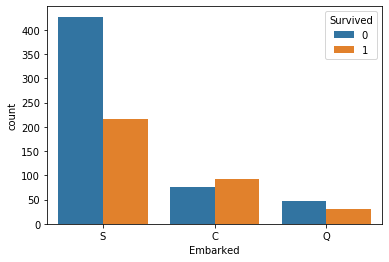

In [1062]:
# Embarked vs Sex
sns.countplot(x="Embarked", hue="Survived", data=data)

### 2. Preprocessing

In [1063]:
# Before starting imputation and features engineering, data should be split
# Then, everything should be done to train test and then reapplied to test set with same parameters

x_train, x_test, y_train, y_test = train_test_split(data.drop("Survived",axis=1), data.Survived, test_size = 0.2,
                                                    random_state = 42)

#### Missing values

In [1064]:
# Age

In [1065]:
x_train.groupby(["Pclass"])["Age"].median().reset_index().rename(columns={"Age":"Age_mean"})

,Pclass,Age_mean
0,1,37.0
1,2,29.0
2,3,25.0


In [1066]:
x_train.groupby(["Sex"])["Age"].median().reset_index().rename(columns={"Age":"Age_mean"})

,Sex,Age_mean
0,female,27.0
1,male,29.0


In [1067]:
x_train.groupby(["SibSp"])["Age"].median().reset_index().rename(columns={"Age":"Age_mean"})

,SibSp,Age_mean
0,0,29.0
1,1,30.0
2,2,24.0
3,3,14.0
4,4,5.5
5,5,11.0
6,8,NaN


In [1068]:
x_train.groupby(["Parch"])["Age"].median().reset_index().rename(columns={"Age":"Age_mean"})

,Parch,Age_mean
0,0,29.0
1,1,22.0
2,2,16.0
3,3,24.0
4,4,45.0
5,5,39.0
6,6,43.0


In [1069]:
age_mean = x_train.groupby(["Pclass","SibSp","Parch"])["Age"].median().reset_index().rename(columns={"Age":"Age_mean"})
age_median_aux = x_train.Age.dropna().median()

In [1070]:
# There's indeed a clear difference between Pclass, SipSp and Parch. So I'll use the mean of each group
x_train = x_train.merge(age_mean, how="left", on=["Pclass","SibSp","Parch"])

In [1071]:
x_train.Age.fillna(x_train.Age_mean, inplace=True)

In [1072]:
x_train.drop("Age_mean",axis=1,inplace=True)

In [1073]:
# As Age is missing for SibSp == 8 I'll use the median of all previos values
x_train.Age.fillna(age_median_aux, inplace=True)

In [1074]:
# Repeating for test set

In [1075]:
# There's indeed a clear difference between Sex and Pclass. So I'll use the mean of each group
x_test = x_test.merge(age_mean, how="left", on=["Pclass","SibSp","Parch"])
x_test.Age.fillna(x_test.Age_mean, inplace=True)
x_test.drop("Age_mean",axis=1,inplace=True)
x_test.Age.fillna(age_median_aux, inplace=True)

In [1076]:
# Embarked

In [1077]:
data[data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [1078]:
embarked_mode = x_train["Embarked"].mode()

In [1079]:
x_train["Embarked"].fillna(embarked_mode, inplace=True)

In [1080]:
x_test["Embarked"].fillna(embarked_mode, inplace=True)

In [1081]:
# Cabin

In [1082]:
# It has a lot of missing values (more than 70%) so i'll drop it by now
data.Cabin.isna().mean()

0.7710437710437711

In [1083]:
#x_train.drop("Cabin", axis=1, inplace=True)

In [1084]:
#x_test.drop("Cabin", axis=1, inplace=True)

In [1085]:
# There was this input of understanding the missing Cabin as passengers who didn't have a Cabin assgined, not as 
# missing data.
x_train["HasCabin"] = 1
x_train.loc[x_train.Cabin.isna(), "HasCabin"] = 0

In [1086]:
x_test["HasCabin"] = 1
x_test.loc[x_test.Cabin.isna(), "HasCabin"] = 0

In [1087]:
# Fare

In [1088]:
# There's only 1 case in the Kaggle data set, I'll use the same method for imputing
# Only difference is using median instead of mean as there are some big values

In [1089]:
fare_mean = x_train.groupby(["Pclass"])["Fare"].median().reset_index().rename(columns={"Fare":"Fare_mean"})

In [1090]:
x_train = x_train.merge(fare_mean, how="left", on=["Pclass"])

In [1091]:
x_train.Fare.fillna(x_train.Fare_mean, inplace=True)

In [1092]:
x_train.drop("Fare_mean",axis=1,inplace=True)

In [1093]:
x_test = x_test.merge(fare_mean, how="left", on=["Pclass"])

x_test.Fare.fillna(x_test.Fare_mean, inplace=True)

x_test.drop("Fare_mean",axis=1,inplace=True)

#### Feature Encoding

In [1094]:
#One Hot Encoding - non-ordinal variables

x_train = pd.concat([x_train, 
           pd.get_dummies(x_train['Sex'], prefix='Sex', drop_first = True), 
           pd.get_dummies(x_train['Embarked'], prefix='Embarked', drop_first = True)],axis=1).drop(["Sex","Embarked"], axis=1)

In [1095]:
x_test = pd.concat([x_test, 
           pd.get_dummies(x_test['Sex'], prefix='Sex', drop_first = True), 
           pd.get_dummies(x_test['Embarked'], prefix='Embarked', drop_first = True)],axis=1).drop(["Sex","Embarked"], axis=1)

### 3. Feature Engineering

In [1096]:
# Adding age groups to highlight survival peaks according to histogram

# AgeBin variable
def ageBin(row):
    if row.Age <= 5:
        return 0 # Child
    elif row.Age <= 15:
        return 1 # Young man
    elif row.Age <= 35:
        return 2 # Adult
    elif row.Age <= 60:
        return 3 # Old Adult
    else:
        return 4 # Granny
    
x_train["AgeBin"] = x_train.apply(lambda row : ageBin(row), axis=1)

In [1097]:
x_test["AgeBin"] = x_test.apply(lambda row : ageBin(row), axis=1)

In [1098]:
# Adding fare groups to highlight survival peaks according to histogram

# FareBin variable
def FareBin(row):
    if row.Fare <= 25:
        return 0 
    elif row.Fare <= 50:
        return 1 
    elif row.Fare <= 100:
        return 2 
    elif row.Fare <= 200:
        return 3 
    else:
        return 4
    
x_train["FareBin"] = x_train.apply(lambda row : FareBin(row), axis=1)

In [1099]:
x_test["FareBin"] = x_test.apply(lambda row : FareBin(row), axis=1)

In [1100]:
# Apply log to Fare to reduce skewness
x_train["Fare"] = x_train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
x_test["Fare"] = x_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [1101]:
# Family Size on board
# FamilySize

x_train["FamilySize"] = x_train.SibSp + x_train.Parch


x_train['Single'] = x_train['FamilySize'].map(lambda x: 1 if x == 1 else 0)
x_train['SmallF'] = x_train['FamilySize'].map(lambda x: 1 if  x == 2  else 0)
x_train['MedF'] = x_train['FamilySize'].map(lambda x: 1 if 3 <= x <= 4 else 0)
x_train['LargeF'] = x_train['FamilySize'].map(lambda x: 1 if x >= 5 else 0)

In [1102]:
x_test["FamilySize"] = x_test.SibSp + x_test.Parch

x_test['Single'] = x_test['FamilySize'].map(lambda x: 1 if x == 1 else 0)
x_test['SmallF'] = x_test['FamilySize'].map(lambda x: 1 if  x == 2  else 0)
x_test['MedF'] = x_test['FamilySize'].map(lambda x: 1 if 3 <= x <= 4 else 0)
x_test['LargeF'] = x_test['FamilySize'].map(lambda x: 1 if x >= 5 else 0)

In [1103]:
# IsAlone if FamilySize = 1
x_train['IsAlone'] = 0
x_train.loc[x_train['FamilySize'] == 1, 'IsAlone'] = 1

x_test['IsAlone'] = 0
x_test.loc[x_test['FamilySize'] == 1, 'IsAlone'] = 1

In [1104]:
# Title as variable

In [1105]:
#words = x_train.Name.str.split(expand=True).stack().value_counts().rename_axis('vals').reset_index(name='count')

In [1106]:
#words[words.vals.str.contains(".", regex=False)]

In [1107]:
x_train['Title'] = x_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
x_train['Title'] = x_train['Title'].replace(['Lady', "Countess","L",'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
x_train['Title'] = x_train['Title'].replace('Mlle', 'Miss')
x_train['Title'] = x_train['Title'].replace('Ms', 'Miss')
x_train['Title'] = x_train['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
x_train['Title'] = x_train['Title'].map(title_mapping)
#x_train['Title'] = x_train['Title'].fillna(0)

#One Hot Encoding

x_train = pd.concat([x_train, 
           pd.get_dummies(x_train['Title'], prefix='Title', drop_first = True)],axis=1).drop(["Title"], axis=1)

In [1108]:
x_test['Title'] = x_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
x_test['Title'] = x_test['Title'].replace(['Lady', "L",'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
x_test['Title'] = x_test['Title'].replace('Mlle', 'Miss')
x_test['Title'] = x_test['Title'].replace('Ms', 'Miss')
x_test['Title'] = x_test['Title'].replace('Mme', 'Mrs')

x_test['Title'] = x_test['Title'].map(title_mapping)
x_test = pd.concat([x_test, 
           pd.get_dummies(x_test['Title'], prefix='Title', drop_first = True)],axis=1).drop(["Title"], axis=1)

In [1109]:
# ShipLocation
# Passengers with same ticket prefix may be close as being in the same area
def getTicketPrefix(row):
    text = row["Ticket"]
    
    if text.isdigit():
        return "NA"
    else:
        prefix = text.replace(".","").replace("/","").strip().split(" ")[0]
        if prefix in ["NA","PC","CA","A5","SOTONOQ","STONO","WC","SCPARIS"]:
            return prefix
        else:
            return "OTHERS"

In [1110]:
x_train["ShipLocation"] = x_train.apply(lambda row : getTicketPrefix(row), axis = 1)

In [1111]:
x_train = pd.concat([x_train, 
           pd.get_dummies(x_train['ShipLocation'], prefix='ShipLocation', drop_first = True)],axis=1).drop(["ShipLocation"], axis=1)

In [1112]:
x_test["ShipLocation"] = x_test.apply(lambda row : getTicketPrefix(row), axis = 1)
x_test = pd.concat([x_test, 
           pd.get_dummies(x_test['ShipLocation'], prefix='ShipLocation', drop_first = True)],axis=1).drop(["ShipLocation"], axis=1)

In [1113]:
#sns.distplot(x_train[x_train.Name.str.contains("Miss.")]["Age"])

In [1114]:
#sns.distplot(x_train[x_train.Name.str.contains("Mrs.")]["Age"])

In [1115]:
#x_train[x_train.Name.str.contains("Mrs.")]

In [1116]:
#data[data.Ticket == "19943"]

In [1117]:
#len(x_train[x_train.Ticket.str.isalnum()])

In [1118]:
#sns.countplot(data[data.Ticket.str.isalnum()]["Survived"])

In [1119]:
#sns.countplot(data[~data.Ticket.str.isalnum()]["Survived"])

In [1120]:
# Artificial features: multiplication 
# PClass x AgeBin
x_train['AgeBin*Class'] = x_train.AgeBin * x_train.Pclass
x_test['AgeBin*Class'] = x_test.AgeBin * x_test.Pclass

# PClass x FamilySize
x_train['FamilySize*Class'] = x_train.FamilySize * x_train.Pclass
x_test['FamilySize*Class'] = x_test.FamilySize * x_test.Pclass

# PClass x Age
x_train['IsAlone*Class'] = x_train.IsAlone * x_train.Pclass
x_test['IsAlone*Class'] = x_test.IsAlone * x_test.Pclass

# PClass x Age
x_train['AgeBin*IsAlone'] = x_train.AgeBin * x_train.IsAlone
x_test['AgeBin*IsAlone'] = x_test.AgeBin * x_test.IsAlone


# PClass x FareBin
x_train['FareBin*Class'] = x_train.FareBin * x_train.Pclass
x_test['FareBin*Class'] = x_test.FareBin * x_test.Pclass
# FareBin x AgeBin
x_train['FareBin*AgeBin'] = x_train.FareBin * x_train.AgeBin
x_test['FareBin*AgeBin'] = x_test.FareBin * x_test.AgeBin
# FareBin x IsAlone
x_train['FareBin*IsAlone'] = x_train.FareBin * x_train.IsAlone
x_test['FareBin*IsAlone'] = x_test.FareBin * x_test.IsAlone

### 4. Modeling

#### Feature selection

In [1121]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'HasCabin', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'AgeBin', 'FareBin', 'FamilySize', 'Single', 'SmallF', 'MedF', 'LargeF',
       'IsAlone', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'ShipLocation_CA', 'ShipLocation_NA', 'ShipLocation_OTHERS',
       'ShipLocation_PC', 'ShipLocation_SCPARIS', 'ShipLocation_SOTONOQ',
       'ShipLocation_STONO', 'ShipLocation_WC', 'AgeBin*Class',
       'FamilySize*Class', 'IsAlone*Class', 'AgeBin*IsAlone', 'FareBin*Class',
       'FareBin*AgeBin', 'FareBin*IsAlone'],
      dtype='object')

In [1122]:
#avail_features = [ 'Pclass', 'Age', 'SibSp', 'Parch',
#       'Fare', 'HasCabin', 'Sex_male', 'Embarked_Q', 'Embarked_S',
#       'AgeBin', 'FareBin', 'FamilySize', 'Single', 'SmallF', 'MedF', 'LargeF',
#       'IsAlone', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
#       'ShipLocation_CA', 'ShipLocation_NA', 'ShipLocation_OTHERS',
#       'ShipLocation_PC', 'ShipLocation_SCPARIS', 'ShipLocation_SOTONOQ',
#       'ShipLocation_STONO', 'ShipLocation_WC', 'AgeBin*Class',
#       'FamilySize*Class', 'IsAlone*Class', 'AgeBin*IsAlone', 'FareBin*Class',
#       'FareBin*AgeBin', 'FareBin*IsAlone']

In [1123]:
avail_features = [ 'Pclass',"Fare", "Age",'HasCabin', 'Sex_male', 'Embarked_Q', 'Embarked_S',
         'Single', 'SmallF', 'MedF',
       'IsAlone', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'ShipLocation_CA', 'ShipLocation_NA', 'ShipLocation_OTHERS',
       'ShipLocation_PC', 'ShipLocation_SCPARIS', 'ShipLocation_SOTONOQ',
       'ShipLocation_STONO', 'ShipLocation_WC', 'AgeBin*Class',
       'FamilySize*Class', 'IsAlone*Class', 'AgeBin*IsAlone', 'FareBin*Class',
       'FareBin*AgeBin', 'FareBin*IsAlone']

In [1124]:
model_f = RandomForestClassifier(random_state = 42)

In [1125]:
model_f.fit(x_train[avail_features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1126]:
model_f.feature_importances_

array([0.04111271, 0.18555483, 0.16776   , 0.01975746, 0.14701984,
       0.0094155 , 0.0225533 , 0.00456268, 0.01036047, 0.00840135,
       0.00436625, 0.06096824, 0.04936035, 0.00947872, 0.00554866,
       0.00794477, 0.01483027, 0.01033347, 0.00280343, 0.00137957,
       0.00307508, 0.00718075, 0.00099154, 0.0520173 , 0.05024602,
       0.00925344, 0.00559649, 0.03814801, 0.04615834, 0.00382116])

In [1127]:
feat_importances = pd.DataFrame({"Features":avail_features,"Importance":model_f.feature_importances_})

In [1128]:
feat_importances.sort_values("Importance",ascending=False, inplace=True)

In [1129]:
feat_importances

,Features,Importance
1,Fare,0.185555
2,Age,0.167760
4,Sex_male,0.147020
11,Title_2,0.060968
23,AgeBin*Class,0.052017
24,FamilySize*Class,0.050246
12,Title_3,0.049360
28,FareBin*AgeBin,0.046158
0,Pclass,0.041113
27,FareBin*Class,0.038148


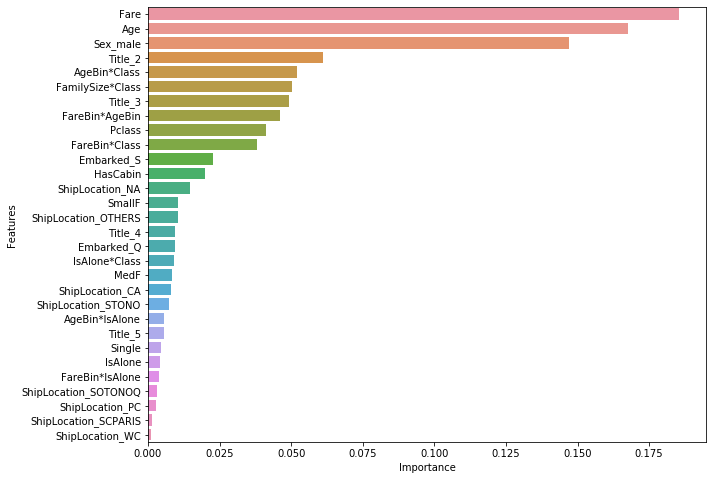

In [1130]:
plt.subplots(figsize=(10,8))
sns.barplot(x="Importance", y="Features", data=feat_importances)

In [1131]:
features = [ 'Pclass',"Fare", "Age",'HasCabin', 'Sex_male', "Embarked_S","SmallF",
            'Title_2', 'Title_3', 'Title_4', 'ShipLocation_NA', 'ShipLocation_OTHERS',
       'AgeBin*Class', 'FamilySize*Class', 'FareBin*Class', 'FareBin*AgeBin']

#### Model fitting

In [1132]:
models_to_test = ["LogReg","RandomForest","XGBoost","ExtraTrees","MLP","KNN","SVM"]
models_accuracy = []

#### Logistic Regression

In [1133]:
model_lg = LogisticRegression(random_state = 42)

In [1134]:
model_lg.fit(x_train[features], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1135]:
pred = model_lg.predict(x_train[features])

In [1136]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.8412921348314607


In [1137]:
pred = model_lg.predict(x_test[features])

In [1138]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.8044692737430168


In [1139]:
models_accuracy.append(round(accuracy_score(y_test, pred),4))

#### Random Forest

In [1140]:
model_rf = RandomForestClassifier(random_state = 42)

In [1141]:
model_rf.fit(x_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1142]:
pred = model_rf.predict(x_train[features])

In [1143]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.9662921348314607


In [1144]:
pred = model_rf.predict(x_test[features])

In [1145]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.8268156424581006


In [1146]:
probs = model_rf.predict_proba(x_test[features])[:,1]

In [1147]:
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

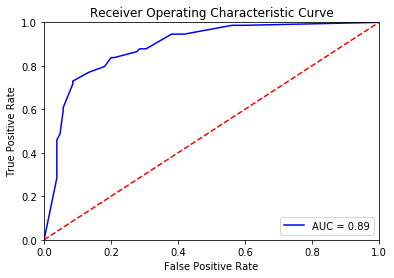

In [1148]:
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1149]:
threshold[np.argmax(tpr - fpr)]

0.6455555555555554

In [1150]:
best_threshold_rf = threshold[np.argmax(tpr - fpr)]

pred2 = (probs >= best_threshold_rf).astype(int)

In [1151]:
print("Test accuracy {}".format(accuracy_score(y_test, pred2)))

Test accuracy 0.8379888268156425


In [1152]:
models_accuracy.append(round(accuracy_score(y_test, pred2),4))

#### XGBoost

In [1153]:
model_xgb = XGBClassifier(random_state = 42)
model_xgb.fit(x_train[features], y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [1154]:
pred = model_xgb.predict(x_train[features])

In [1155]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.973314606741573


In [1156]:
pred = model_xgb.predict(x_test[features])

In [1157]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.7932960893854749


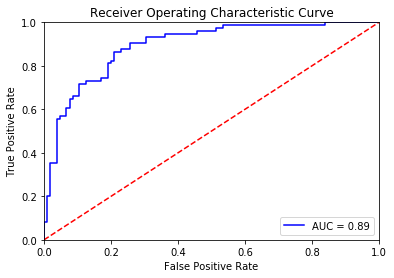

In [1158]:
probs = model_xgb.predict_proba(x_test[features])[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1159]:
threshold[np.argmax(tpr - fpr)]

0.32913488

In [1160]:
best_threshold_xgb = threshold[np.argmax(tpr - fpr)]

pred2 = (probs >= best_threshold_xgb).astype(int)

In [1161]:
print("Test accuracy {}".format(accuracy_score(y_test, pred2)))

Test accuracy 0.8212290502793296


In [1162]:
models_accuracy.append(round(accuracy_score(y_test, pred2),4))

#### Extra Trees

In [1163]:
model_et = ExtraTreesClassifier(random_state = 42)
model_et.fit(x_train[features], y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [1164]:
pred = model_et.predict(x_train[features])

In [1165]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.9887640449438202


In [1166]:
pred = model_et.predict(x_test[features])

In [1167]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.8268156424581006


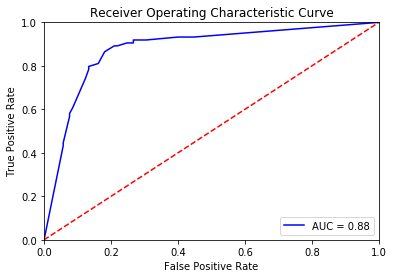

In [1168]:
probs = model_et.predict_proba(x_test[features])[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1169]:
threshold[np.argmax(tpr - fpr)]

0.5

In [1170]:
best_threshold_et = threshold[np.argmax(tpr - fpr)]

pred2 = (probs >= best_threshold_et).astype(int)

In [1171]:
print("Test accuracy {}".format(accuracy_score(y_test, pred2)))

Test accuracy 0.8379888268156425


In [1172]:
models_accuracy.append(round(accuracy_score(y_test, pred2),4))

#### MLP

In [1173]:
model_nn = MLPClassifier(random_state = 42)
model_nn.fit(x_train[features], y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [1174]:
pred = model_nn.predict(x_train[features])

In [1175]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.8581460674157303


In [1176]:
pred = model_nn.predict(x_test[features])

In [1177]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.8156424581005587


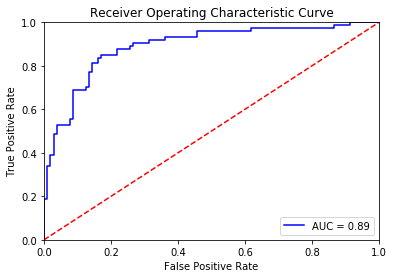

In [1178]:
probs = model_nn.predict_proba(x_test[features])[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1179]:
threshold[np.argmax(tpr - fpr)]

0.3595775854612133

In [1180]:
best_threshold_nn = threshold[np.argmax(tpr - fpr)]

pred2 = (probs >= best_threshold_nn).astype(int)

In [1181]:
print("Test accuracy {}".format(accuracy_score(y_test, pred2)))

Test accuracy 0.8379888268156425


In [1182]:
models_accuracy.append(round(accuracy_score(y_test, pred2),4))

#### KNN

In [1183]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train[features], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1184]:
pred = model_knn.predict(x_train[features])

In [1185]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.8160112359550562


In [1186]:
pred = model_knn.predict(x_test[features])

In [1187]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.7597765363128491


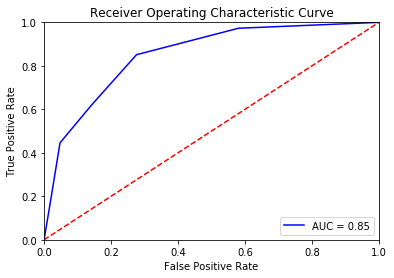

In [1188]:
probs = model_knn.predict_proba(x_test[features])[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1223]:
threshold[np.argmax(tpr - fpr)]

0.4

In [1190]:
best_threshold_knn = threshold[np.argmax(tpr - fpr)]

pred2 = (probs >= best_threshold_knn).astype(int)

In [1191]:
print("Test accuracy {}".format(accuracy_score(y_test, pred2)))

Test accuracy 0.776536312849162


In [1192]:
models_accuracy.append(round(accuracy_score(y_test, pred2),4))

#### SVM

In [1193]:
model_svm = SVC(random_state = 42)
model_svm.fit(x_train[features], y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [1194]:
pred = model_svm.predict(x_train[features])

In [1195]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.851123595505618


In [1196]:
pred = model_svm.predict(x_test[features])

In [1197]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.7932960893854749


In [1198]:
models_accuracy.append(round(accuracy_score(y_test, pred),4))

#### Accuracy for all models

In [1199]:
models_results = pd.DataFrame({"Algorithm":models_to_test,"Accuracy":models_accuracy})

In [1200]:
models_results.sort_values("Accuracy",ascending=False)

,Algorithm,Accuracy
1,RandomForest,0.8380
3,ExtraTrees,0.8380
4,MLP,0.8380
2,XGBoost,0.8212
0,LogReg,0.8045
6,SVM,0.7933
5,KNN,0.7765


### Ensemble

In [1201]:
votingC = VotingClassifier(estimators=[('RF', model_rf), ('ET', model_et),
('NN', model_nn), ("XGB",model_xgb)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_train[features], y_train)

In [1202]:
pred = votingC.predict(x_train[features])

In [1203]:
print("Train accuracy {}".format(accuracy_score(y_train, pred)))

Train accuracy 0.9845505617977528


In [1204]:
pred = votingC.predict(x_test[features])

In [1205]:
print("Test accuracy {}".format(accuracy_score(y_test, pred)))

Test accuracy 0.8324022346368715


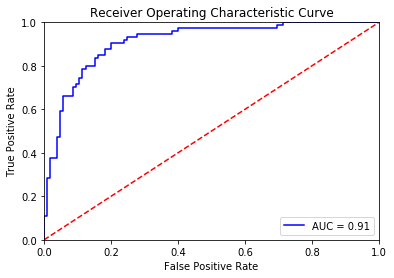

In [1224]:
probs = votingC.predict_proba(x_test[features])[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1225]:
threshold[np.argmax(tpr - fpr)]

0.3270206758358717

In [1226]:
best_threshold_voting = threshold[np.argmax(tpr - fpr)]

pred2 = (probs >= best_threshold_voting).astype(int)

In [1227]:
print("Test accuracy {}".format(accuracy_score(y_test, pred2)))

Test accuracy 0.8435754189944135


In [1228]:
#Final model
model = votingC

### Kaggle submission

In [1229]:
kaggle_test = pd.read_csv("data/test.csv")

In [1230]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1231]:
# EDA of test set

In [1232]:
kaggle_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Univariate

In [1233]:
#PassengerClass
kaggle_test.Pclass.value_counts()/ len(kaggle_test)

3    0.521531
1    0.255981
2    0.222488
Name: Pclass, dtype: float64

In [1234]:
#Sex
kaggle_test.Sex.value_counts()/ len(kaggle_test)

male      0.636364
female    0.363636
Name: Sex, dtype: float64

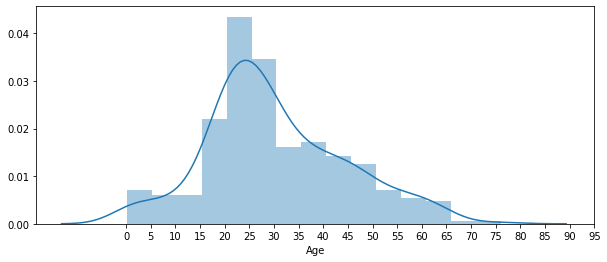

In [1235]:
#Age
plt.subplots(figsize=(10,4))
sns.distplot(kaggle_test.Age.dropna()).set_xticks([i for i in range(0,100,5)])

In [1236]:
kaggle_test[kaggle_test.Age<1 ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.400,NaN,S
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.750,NaN,S
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,NaN,S
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


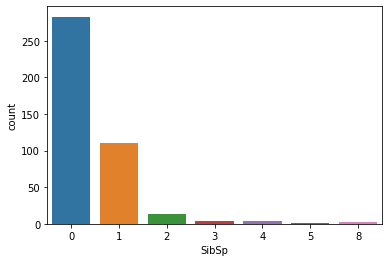

In [1237]:
#SibSp
sns.countplot(kaggle_test.SibSp)

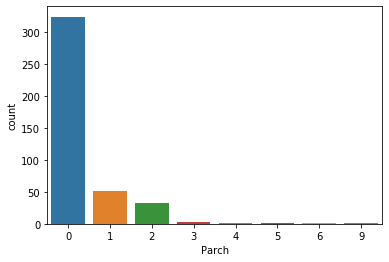

In [1238]:
#ParCh
sns.countplot(kaggle_test.Parch)

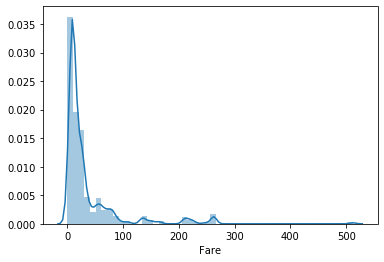

In [1239]:
#Fare
sns.distplot(kaggle_test.Fare.dropna())

In [1240]:
kaggle_test[kaggle_test.Fare == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


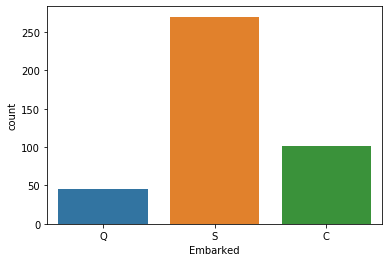

In [1241]:
#Embarked
sns.countplot(kaggle_test.Embarked)

In [1242]:
# Data processing & Feature eng.

In [1243]:
#Age
kaggle_test = kaggle_test.merge(age_mean, how="left", on=["Pclass","SibSp","Parch"])
kaggle_test.Age.fillna(kaggle_test.Age_mean, inplace=True)
kaggle_test.drop("Age_mean",axis=1,inplace=True)
kaggle_test.Age.fillna(age_median_aux, inplace=True)
#Embarked
kaggle_test["Embarked"].fillna(embarked_mode, inplace=True)
#Cabin
kaggle_test["HasCabin"] = 1
kaggle_test.loc[kaggle_test.Cabin.isna(), "HasCabin"] = 0
#Fare
kaggle_test = kaggle_test.merge(fare_mean, how="left", on=["Pclass"])
kaggle_test.Fare.fillna(kaggle_test.Fare_mean, inplace=True)
kaggle_test.drop("Fare_mean",axis=1,inplace=True)
kaggle_test["Fare"] = kaggle_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
#Encoding
kaggle_test = pd.concat([kaggle_test, 
           pd.get_dummies(kaggle_test['Sex'], prefix='Sex', drop_first = True), 
           pd.get_dummies(kaggle_test['Embarked'], prefix='Embarked', drop_first = True)],axis=1).drop(["Sex","Embarked"], axis=1)

#FeatEngineering
#AgeBin
kaggle_test["AgeBin"] = kaggle_test.apply(lambda row : ageBin(row), axis=1)
kaggle_test["FamilySize"] = kaggle_test.SibSp + kaggle_test.Parch

#Title
kaggle_test['Title'] = kaggle_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
kaggle_test['Title'] = kaggle_test['Title'].replace(['Lady', "L",'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
kaggle_test['Title'] = kaggle_test['Title'].replace('Mlle', 'Miss')
kaggle_test['Title'] = kaggle_test['Title'].replace('Ms', 'Miss')
kaggle_test['Title'] = kaggle_test['Title'].replace('Mme', 'Mrs')
kaggle_test['Title'] = kaggle_test['Title'].map(title_mapping)
kaggle_test = pd.concat([kaggle_test, 
           pd.get_dummies(kaggle_test['Title'], prefix='Title', drop_first = True)],axis=1).drop(["Title"], axis=1)
#FareBin
kaggle_test["FareBin"] = kaggle_test.apply(lambda row : FareBin(row), axis=1)
#IsAlone
kaggle_test['IsAlone'] = 0
kaggle_test.loc[kaggle_test['FamilySize'] == 1, 'IsAlone'] = 1
#ShipLocation
kaggle_test["ShipLocation"] = kaggle_test.apply(lambda row : getTicketPrefix(row), axis = 1)
kaggle_test = pd.concat([kaggle_test, 
           pd.get_dummies(kaggle_test['ShipLocation'], prefix='ShipLocation', drop_first = True)],axis=1).drop(["ShipLocation"], axis=1)
#FamilySize groups
kaggle_test['Single'] = kaggle_test['FamilySize'].map(lambda x: 1 if x == 1 else 0)
kaggle_test['SmallF'] = kaggle_test['FamilySize'].map(lambda x: 1 if  x == 2  else 0)
kaggle_test['MedF'] = kaggle_test['FamilySize'].map(lambda x: 1 if 3 <= x <= 4 else 0)
kaggle_test['LargeF'] = kaggle_test['FamilySize'].map(lambda x: 1 if x >= 5 else 0)

#Artificial variables
# PClass x AgeBin
kaggle_test['AgeBin*Class'] = kaggle_test.AgeBin * kaggle_test.Pclass
# PClass x FamilySize
kaggle_test['FamilySize*Class'] = kaggle_test.FamilySize * kaggle_test.Pclass
# PClass x Age
kaggle_test['IsAlone*Class'] = kaggle_test.IsAlone * kaggle_test.Pclass
# PClass x Age
kaggle_test['AgeBin*IsAlone'] = kaggle_test.AgeBin * kaggle_test.IsAlone
# PClass x FareBin
kaggle_test['FareBin*Class'] = kaggle_test.FareBin * kaggle_test.Pclass
# FareBin x AgeBin
kaggle_test['FareBin*AgeBin'] = kaggle_test.FareBin * kaggle_test.AgeBin
# FareBin x IsAlone
kaggle_test['FareBin*IsAlone'] = kaggle_test.FareBin * kaggle_test.IsAlone



In [1244]:
pred_k = model.predict(kaggle_test[features])

In [1245]:
probs_k = model.predict_proba(kaggle_test[features])[:,1]
pred_k2 = (probs_k >= best_threshold_voting).astype(int)

In [1246]:
submission = pd.DataFrame({"PassengerId":kaggle_test.PassengerId,"Survived":pred_k2})

In [1247]:
submission.to_csv("output/submission_10.csv",index=False)